In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from aerometrics.utils.functions import emission_profile_function
from aerometrics.metrics.metrics import co2_ipcc_pulse_absolute_metrics, absolute_metrics, relative_metrics
from aerometrics.climate_models.co2_ipcc_climate_model import co2_ipcc_climate_model
from aerometrics.climate_models.gwpstar_climate_model import species_gwpstar_climate_model
from aerometrics.climate_models.lwe_climate_model import species_lwe_climate_model
from aerometrics.climate_models.fair_climate_model import background_species_quantities_function, species_fair_climate_model

## Parameters

In [2]:
climate_model = "FaIR"
co2_method = 'FaIR'
profile = "pulse"
start_year = 1765
t0 = 2020
time_horizon = 100
end_year = t0 + time_horizon

sensitivity_rf_co2 = 9.2e-16 # Not used with FaIR
ratio_erf_rf_co2 = 1
efficacy_erf_co2 = 1
unit_value_co2 = 1*10**10

background_species_quantities = background_species_quantities_function(start_year, end_year, rcp='RCP45')

emission_profile_co2 = emission_profile_function(start_year,t0,time_horizon, profile, unit_value_co2)

species_settings_co2 = {"sensitivity_rf": sensitivity_rf_co2, "ratio_erf_rf": ratio_erf_rf_co2, "efficacy_erf": efficacy_erf_co2}
model_settings_co2 = {"background_species_quantities": background_species_quantities}
radiative_forcing_co2, effective_radiative_forcing_co2, temperature_co2 = species_fair_climate_model(start_year, end_year, "Aviation CO2", emission_profile_co2, species_settings_co2, model_settings_co2)
radiative_forcing_co2_unit, effective_radiative_forcing_co2_unit, temperature_co2_unit = radiative_forcing_co2/unit_value_co2, effective_radiative_forcing_co2/unit_value_co2, temperature_co2/unit_value_co2
agwp_rf_co2, agwp_erf_co2, aegwp_rf_co2, aegwp_erf_co2, agtp_co2, iagtp_co2, atr_co2 = absolute_metrics(radiative_forcing_co2_unit, effective_radiative_forcing_co2_unit, efficacy_erf_co2, temperature_co2_unit, time_horizon)

species = "Aviation contrails"
unit_value = 1*10**10
emission_profile = emission_profile_function(start_year,t0,time_horizon, profile, unit_value)

## Metrics calculation

In [3]:
gwp_rf = np.zeros(3)
gwp_erf = np.zeros(3)
egwp_erf = np.zeros(3)
gtp = np.zeros(3)
ratr = np.zeros(3)

for k in range(0,3):
    if k == 0:
        sensitivity_rf = 2.23e-12
        ratio_erf_rf = 0.42
        efficacy_erf = 1
    elif k == 1:
        sensitivity_rf = 2.23e-12
        ratio_erf_rf = 0.55
        efficacy_erf = 0.38
    elif k == 2:
        sensitivity_rf = 2.23e-12 * 0.557
        ratio_erf_rf = 0.42
        efficacy_erf = 1

    species_settings = {"sensitivity_rf": sensitivity_rf, "ratio_erf_rf": ratio_erf_rf, "efficacy_erf": efficacy_erf}
    model_settings = {"background_species_quantities": background_species_quantities}
    radiative_forcing, effective_radiative_forcing, temperature = species_fair_climate_model(start_year, end_year, species, emission_profile, species_settings, model_settings)
    radiative_forcing_unit, effective_radiative_forcing_unit, temperature_unit = radiative_forcing/unit_value, effective_radiative_forcing/unit_value, temperature/unit_value
    agwp_rf, agwp_erf, aegwp_rf, aegwp_erf, agtp, iagtp, atr = absolute_metrics(radiative_forcing_unit, effective_radiative_forcing_unit, efficacy_erf, temperature_unit, time_horizon)
        
    gwp_rf[k], gwp_erf[k], egwp_rf, egwp_erf[k], gtp[k], igtp, ratr[k] = relative_metrics(agwp_rf_co2, agwp_erf_co2, aegwp_rf_co2, aegwp_erf_co2, agtp_co2, iagtp_co2, atr_co2, agwp_rf, agwp_erf, aegwp_rf, aegwp_erf, agtp, iagtp, atr)

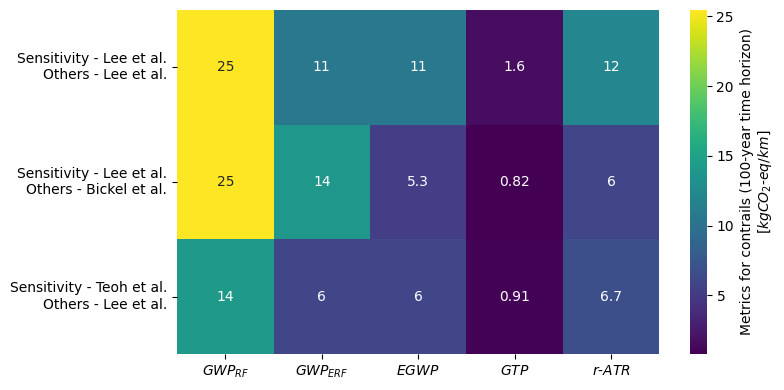

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Génère des données aléatoires
selected_metrics = [r"$GWP_{RF}$", r"$GWP_{ERF}$", r"$EGWP$", r"$GTP$", r"$r\text{-}ATR$"]
data = np.zeros((3, 5))
data[:,0] = gwp_rf
data[:,1] = gwp_erf
data[:,2] = egwp_erf
data[:,3] = gtp
data[:,4] = ratr

# Affiche la heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(data, annot=True, cmap="viridis", cbar=True, xticklabels=selected_metrics,
            yticklabels=['Sensitivity - Lee et al.\nOthers - Lee et al.', 'Sensitivity - Lee et al.\nOthers - Bickel et al.', 'Sensitivity - Teoh et al.\nOthers - Lee et al.'], 
            cbar_kws={"label": 'Metrics for contrails (100-year time horizon)\n[$kgCO_2\\text{-}eq/km$]'})
plt.tight_layout()
plt.savefig("figures/alternative_settings.pdf")
plt.show()